# Model Building

### Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Augmenting the data 

In [2]:
#setting parameter for Image Data agumentation to the traing data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

### Loading our data and performing data agumentation

In [3]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(r'D:\\Programming\\IBM\\Dataset\\train',target_size=(64, 64),batch_size=3,color_mode='grayscale',class_mode='categorical')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(r'D:\\Programming\\IBM\\Dataset\\test',target_size=(64, 64),batch_size=3,color_mode='grayscale',class_mode='categorical') 
print(x_train.class_indices)

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


### Model Creation

In [4]:
# Initializing the CNN
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512 , activation='relu'))
model.add(Dense(units=6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

### Model Compilation

In [5]:
# Compiling the CNN
# categorical_crossentropy for more than 2
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

## Model fitting

In [6]:
# It will generate packets of train and test data for training
his = model.fit_generator(x_train,steps_per_epoch = 594/3 ,epochs = 25,validation_data = x_test,validation_steps = 30/3 )
his

Epoch 1/25


C:\Users\Ganes\AppData\Local\Temp\ipykernel_9860\645856196.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(x_train,steps_per_epoch = 594/3 ,epochs = 25,validation_data = x_test,validation_steps = 30/3 )


198/198 [==============================] - 4s 20ms/step - loss: 1.4441 - accuracy: 0.4226 - val_loss: 0.8482 - val_accuracy: 0.6667
Epoch 2/25
198/198 [==============================] - 4s 19ms/step - loss: 0.5923 - accuracy: 0.7710 - val_loss: 0.7311 - val_accuracy: 0.7000
Epoch 3/25
198/198 [==============================] - 4s 19ms/step - loss: 0.3948 - accuracy: 0.8653 - val_loss: 0.4363 - val_accuracy: 0.9000
Epoch 4/25
198/198 [==============================] - 4s 20ms/step - loss: 0.3358 - accuracy: 0.8687 - val_loss: 0.2894 - val_accuracy: 0.8667
Epoch 5/25
198/198 [==============================] - 4s 20ms/step - loss: 0.1976 - accuracy: 0.9343 - val_loss: 0.2234 - val_accuracy: 0.9667
Epoch 6/25
198/198 [==============================] - 4s 19ms/step - loss: 0.1945 - accuracy: 0.9293 - val_loss: 0.1992 - val_accuracy: 0.9000
Epoch 7/25
198/198 [==============================] - 4s 19ms/step - loss: 0.1128 - accuracy: 0.9562 - val_loss: 0.2645 - val_accuracy: 0.9667
Epoch 8/25

### Saving model

In [7]:
# Save the model
model.save('gesture.h5')

# Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [9]:
print(his.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


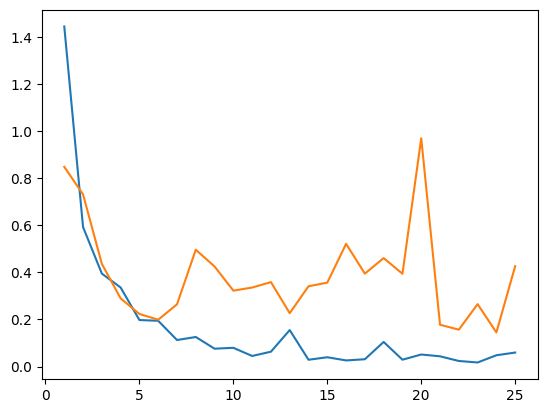

In [10]:
train_loss = his.history['loss']
val_loss   = his.history['val_loss']
train_acc  = his.history['accuracy']
val_acc    = his.history['val_accuracy']
xc         = range(1,26)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)

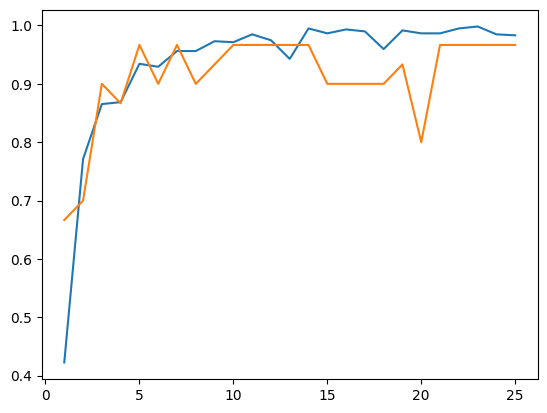

In [11]:
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)